In [2]:
#Python Data Analysis imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

#Visualisation imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#To grab stock data
from pandas_datareader import DataReader
from datetime import datetime

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

In [3]:
#We're going to analyse stock info for Apple, Google, Microsoft, and Amazon
tech_list = ['AMZN','DPZ','BTC','NFLX']

In [4]:
#Setting the end date to today
end = datetime.now()

#Start date set to 1 year back
start = datetime(end.year-1,end.month,end.day) 

In [5]:
for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [6]:
BTC.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-03,91.900002,91.900002,91.860001,91.861801,89.749352,400
2023-02-06,91.489998,91.489998,91.403999,91.403999,89.302086,103
2023-02-07,91.449997,91.449997,91.362999,91.362999,89.262016,555
2023-02-08,91.476097,91.476097,91.476097,91.476097,89.372520,1550
2023-02-09,91.489998,91.489998,91.275101,91.275101,89.176147,403


In [7]:
#Basic stats for BTC Stock
BTC.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,91.264008,91.294393,91.236376,91.264394,89.961450,2664.944000
std,1.119281,1.122314,1.112415,1.113564,1.187529,13137.226762
min,88.430496,88.430496,88.430496,88.430496,87.809784,1.000000
25%,90.581873,90.594503,90.571476,90.580349,89.086531,19.000000
50%,91.452499,91.485600,91.406200,91.433998,89.841423,226.000000
75%,92.087498,92.152372,92.053877,92.084499,90.705956,895.000000
max,93.264999,93.389999,93.160004,93.160004,92.820801,119712.000000


In [8]:
#Some basic info about the dataframe
BTC.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2023-02-03 to 2024-02-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       250 non-null    float64
 1   High       250 non-null    float64
 2   Low        250 non-null    float64
 3   Close      250 non-null    float64
 4   Adj Close  250 non-null    float64
 5   Volume     250 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [9]:
# General info
BTC.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2023-02-03 to 2024-02-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       250 non-null    float64
 1   High       250 non-null    float64
 2   Low        250 non-null    float64
 3   Close      250 non-null    float64
 4   Adj Close  250 non-null    float64
 5   Volume     250 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


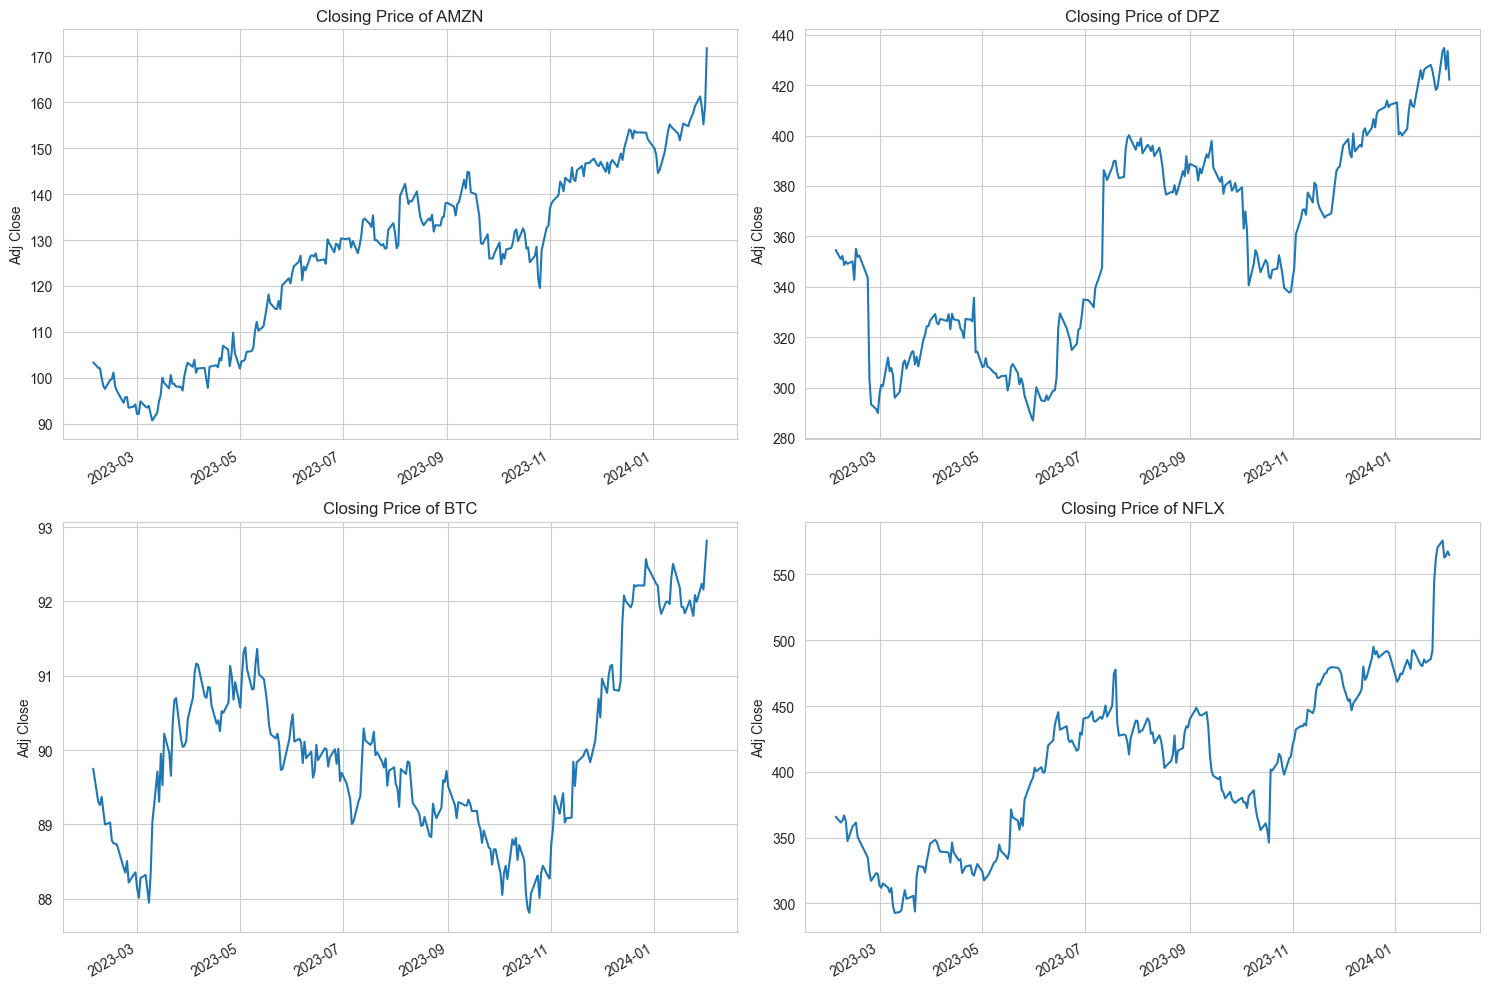

In [10]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, stock_name in enumerate(tech_list, 1):
    stock_data = globals()[stock_name]
    
    plt.subplot(2, 2, i)
    stock_data['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {stock_name}")

plt.tight_layout()
plt.show()


# 1. What was the change in price of the stock overtime?

<Axes: xlabel='Date'>

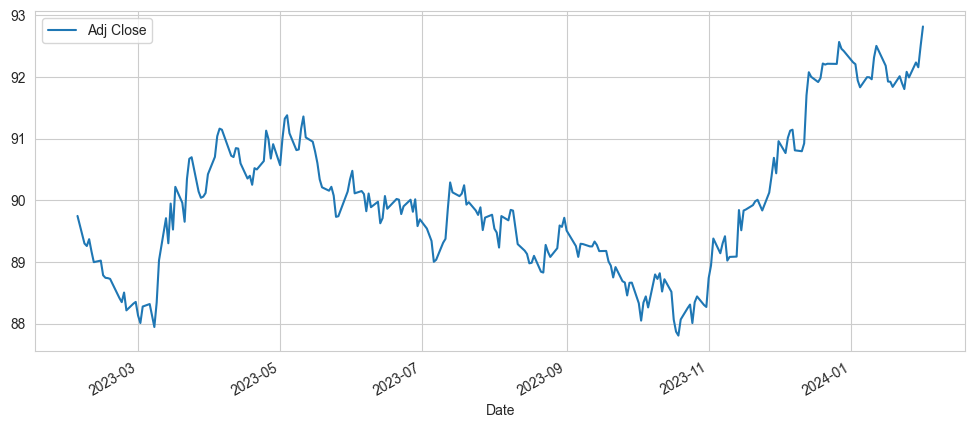

In [11]:
#Plotting the stock's adjusted closing price using pandas
BTC['Adj Close'].plot(legend=True,figsize=(12,5))

<Axes: xlabel='Date'>

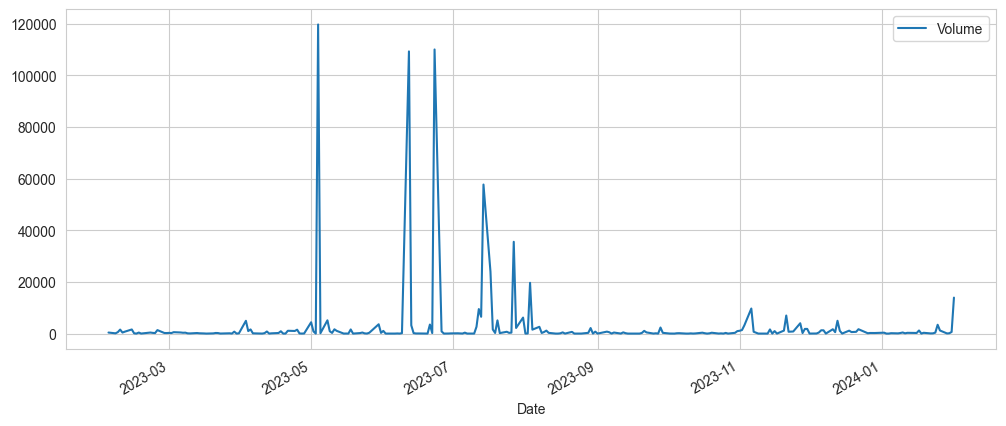

In [12]:
#Plotting the total volume being traded over time
BTC['Volume'].plot(legend=True,figsize=(12,5))

# 2. What was the daily return average of a stock?


In [13]:
#The daily return column can be created by using the percentage change over the adjusted closing price
BTC['Daily Return'] = BTC['Adj Close'].pct_change()

In [14]:
BTC['Daily Return'].tail()

Date
2024-01-26   -0.000988
2024-01-29    0.002635
2024-01-30   -0.000841
2024-01-31    0.003731
2024-02-01    0.003429
Name: Daily Return, dtype: float64

<Axes: xlabel='Date'>

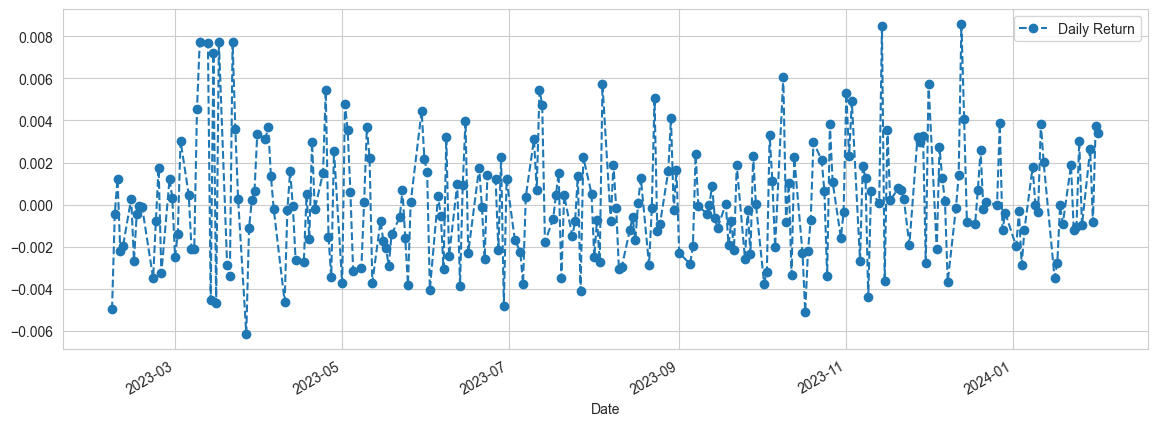

In [15]:
#Plotting the daily return
BTC['Daily Return'].plot(figsize=(14,5),legend=True,linestyle='--',marker='o')

<Axes: xlabel='Daily Return', ylabel='Count'>

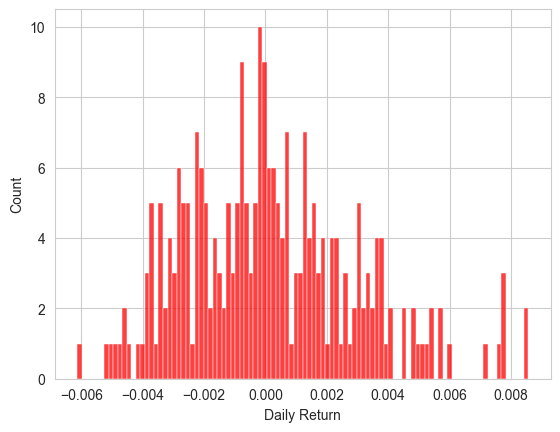

In [16]:
sns.histplot(x=BTC['Daily Return'].dropna(),bins=100,color='red')


# 3.What was the moving average of various stocks?

In [17]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    BTC[column_name] = BTC['Adj Close'].rolling(window=ma,center=False).mean()

In [18]:
BTC.tail()

,Open,High,Low,Close,Adj Close,Volume,Daily Return,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,,
2024-01-26,91.980003,92.050003,91.980003,91.995003,91.995003,1197,-0.000988,92.019091,92.079215,91.414685
2024-01-29,92.237396,92.237396,92.237396,92.237396,92.237396,59,0.002635,91.992220,92.068085,91.462537
2024-01-30,92.159798,92.159798,92.159798,92.159798,92.159798,122,-0.000841,91.989710,92.054915,91.515388
2024-01-31,92.592903,92.592903,92.503601,92.503601,92.503601,637,0.003731,92.047200,92.068095,91.568727
2024-02-01,92.730003,92.944801,92.730003,92.820801,92.820801,13928,0.003429,92.136780,92.098635,91.628047


<Axes: xlabel='Date'>

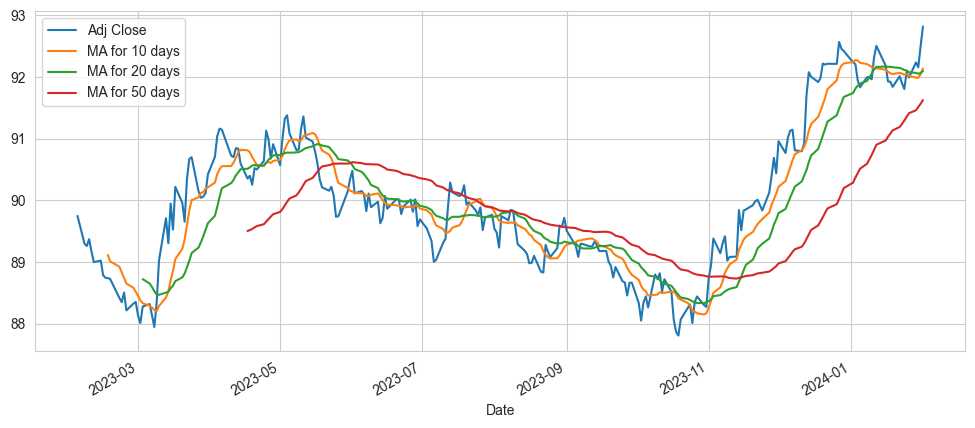

In [19]:
BTC[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(12,5))

# 4. What was the correlation between daily returns of different stocks?

In [28]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.tail()

[*********************100%%**********************]  4 of 4 completed
C:\Users\Deepak\AppData\Local\Temp\ipykernel_10060\1554959276.py:6: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  tech_rets = closing_df.pct_change()


Ticker,AMZN,BTC,DPZ,NFLX
Date,,,,
2024-01-29,0.013449,0.002635,0.034167,0.009414
2024-01-30,-0.014015,-0.000841,0.002999,-0.022473
2024-01-31,-0.023899,0.003731,-0.019598,0.002239
2024-02-01,0.026289,0.003429,0.017151,0.006027
2024-02-02,0.078666,0.000000,-0.026457,-0.005057


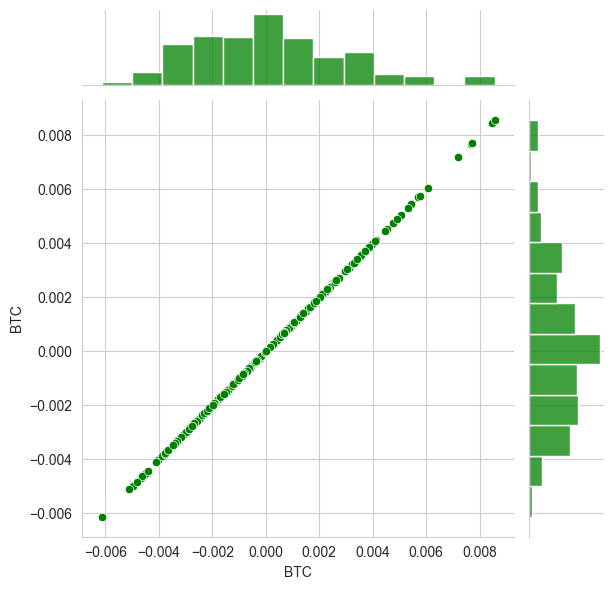

In [32]:
#  creating a scatterplot to visualise any correlations between different stocks. 
# First we'll visualise a scatterplot for the relationship between the daily return of a stock to itself.

sns.jointplot(x='BTC', y='BTC', data=tech_rets, kind='scatter', color='green')


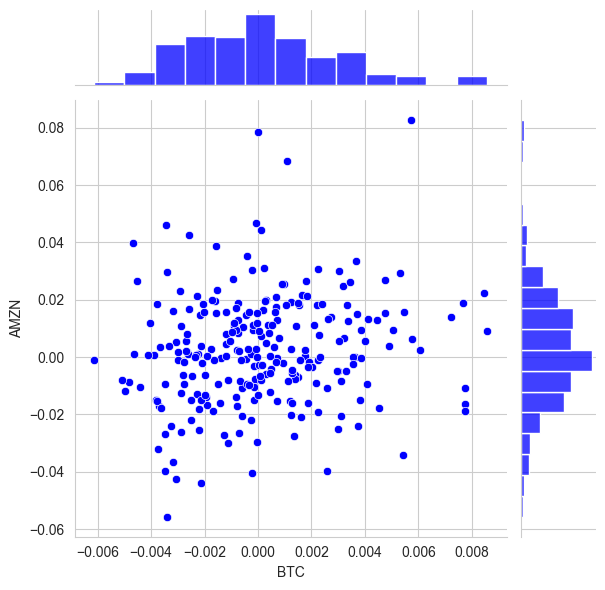

In [37]:
# As expected, the relationship is perfectly linear because we're trying to correlate something with itself.
# Now, let's check out the relationship between Google and Apple's daily returns.

sns.jointplot(x = 'BTC',y = 'AMZN',data= tech_rets,kind='scatter',color='blue')


c:\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


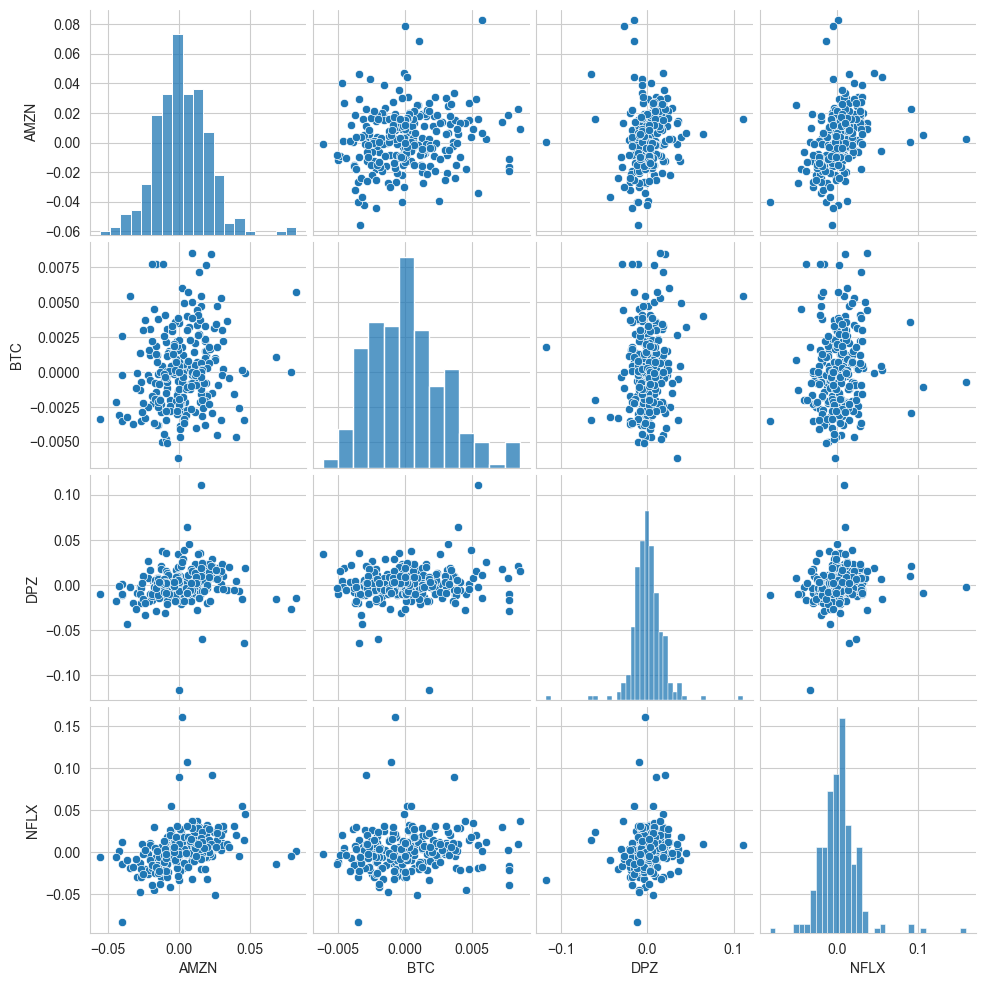

In [41]:
sns.pairplot(tech_rets.dropna())

<Axes: xlabel='Ticker', ylabel='Date'>

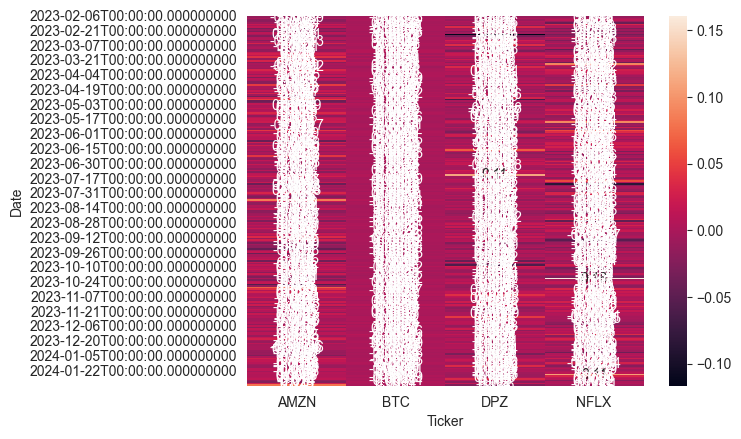

In [47]:
sns.heatmap(tech_rets.dropna(),annot=True)

# 5.How much value do we put at risk by investing in a particular stock?


In [48]:
rets = tech_rets.dropna()

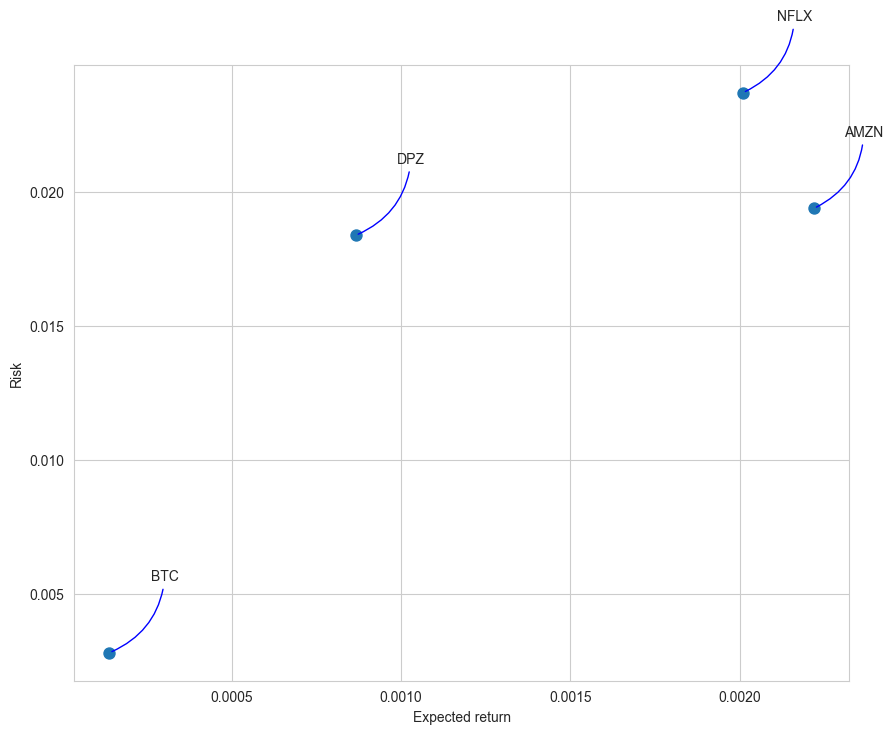

In [51]:

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# 6. Predicting the closing price stock price of BTC

In [52]:
# Get the stock quote
df = pdr.get_data_yahoo('BTC', start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-10-01,100.000000,100.000000,100.000000,100.000000,96.285782,0
2020-10-02,100.000000,100.000000,100.000000,100.000000,96.285782,0
2020-10-05,100.029999,100.040001,99.995003,99.995003,96.280968,10725
2020-10-06,100.010002,100.029999,100.010002,100.029999,96.314667,10080
2020-10-07,99.949997,99.959999,99.919998,99.919998,96.208748,6350
...,...,...,...,...,...,...
2024-01-29,92.237396,92.237396,92.237396,92.237396,92.237396,59
2024-01-30,92.159798,92.159798,92.159798,92.159798,92.159798,122
2024-01-31,92.592903,92.592903,92.503601,92.503601,92.503601,637


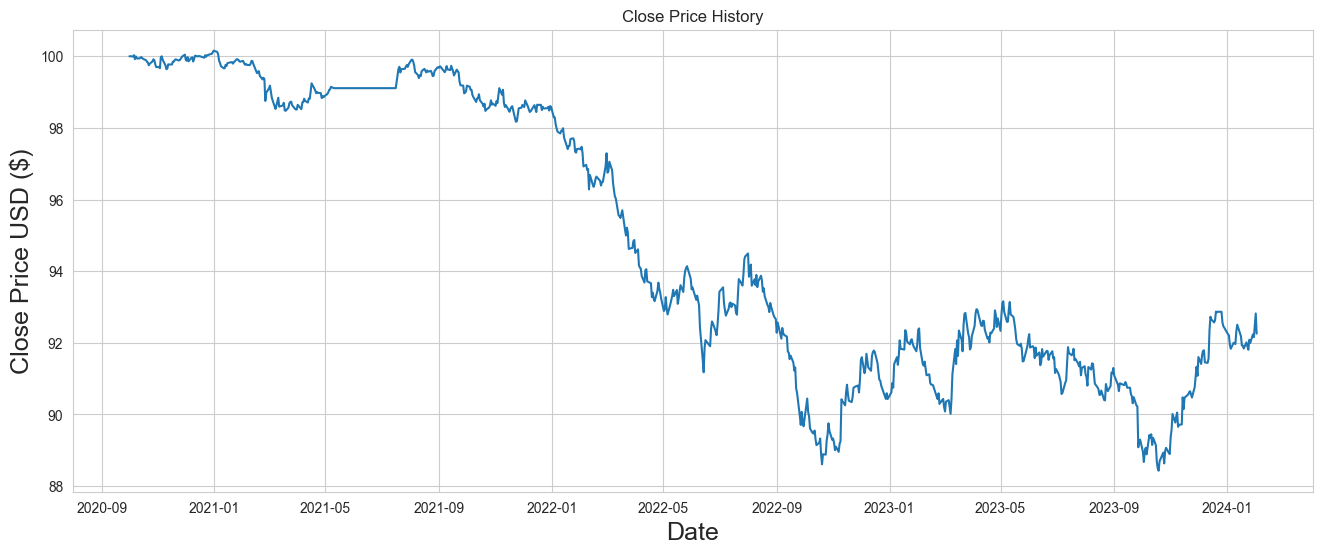

In [53]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [54]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

798

In [55]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.98677993],
       [0.98677993],
       [0.9863537 ],
       [0.98933857],
       [0.97995645],
       [0.9863537 ],
       [0.98166265],
       [0.98166265],
       [0.98379441],
       [0.98464751],
       [0.98208887],
       [0.98038333],
       [0.97739781],
       [0.9737388 ],
       [0.97179444],
       [0.96545706],
       [0.9688688 ],
       [0.97483917],
       [0.97953023],
       [0.97697159],
       [0.9671626 ],
       [0.96118377],
       [0.9613972 ],
       [0.95820736],
       [0.98463059],
       [0.9866693 ],
       [0.97866021],
       [0.96514146],
       [0.95607495],
       [0.95737965],
       [0.96751269],
       [0.96721401],
       [0.9671626 ],
       [0.97398608],
       [0.97398608],
       [0.97739781],
       [0.97953023],
       [0.97697159],
       [0.97697159],
       [0.97910401],
       [0.98592683],
       [0.99061789],
       [0.97830167],
       [0.97611849],
       [0.98464751],
       [0.9749075 ],
       [0.98294197],
       [0.984

In [56]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.98677993, 0.98677993, 0.9863537 , 0.98933857, 0.97995645,
       0.9863537 , 0.98166265, 0.98166265, 0.98379441, 0.98464751,
       0.98208887, 0.98038333, 0.97739781, 0.9737388 , 0.97179444,
       0.96545706, 0.9688688 , 0.97483917, 0.97953023, 0.97697159,
       0.9671626 , 0.96118377, 0.9613972 , 0.95820736, 0.98463059,
       0.9866693 , 0.97866021, 0.96514146, 0.95607495, 0.95737965,
       0.96751269, 0.96721401, 0.9671626 , 0.97398608, 0.97398608,
       0.97739781, 0.97953023, 0.97697159, 0.97697159, 0.97910401,
       0.98592683, 0.99061789, 0.97830167, 0.97611849, 0.98464751,
       0.9749075 , 0.98294197, 0.98422129, 0.97441295, 0.98080955,
       0.98815295, 0.9863537 , 0.98720615, 0.98720615, 0.9863537 ,
       0.98550061, 0.98337665, 0.98933857, 0.98593529, 0.98905745])]
[0.9921535912709514]

[array([0.98677993, 0.98677993, 0.9863537 , 0.98933857, 0.97995645,
       0.9863537 , 0.98166265, 0.98166265, 0.98379441, 0.98464751,
       0.98208887, 0.98038333, 0.977

In [57]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

738/738 [==============================] - 18s 19ms/step - loss: 0.0044


In [58]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2/2 [==============================] - 1s 28ms/step


0.5509419202634951

C:\Users\Deepak\AppData\Local\Temp\ipykernel_10060\2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


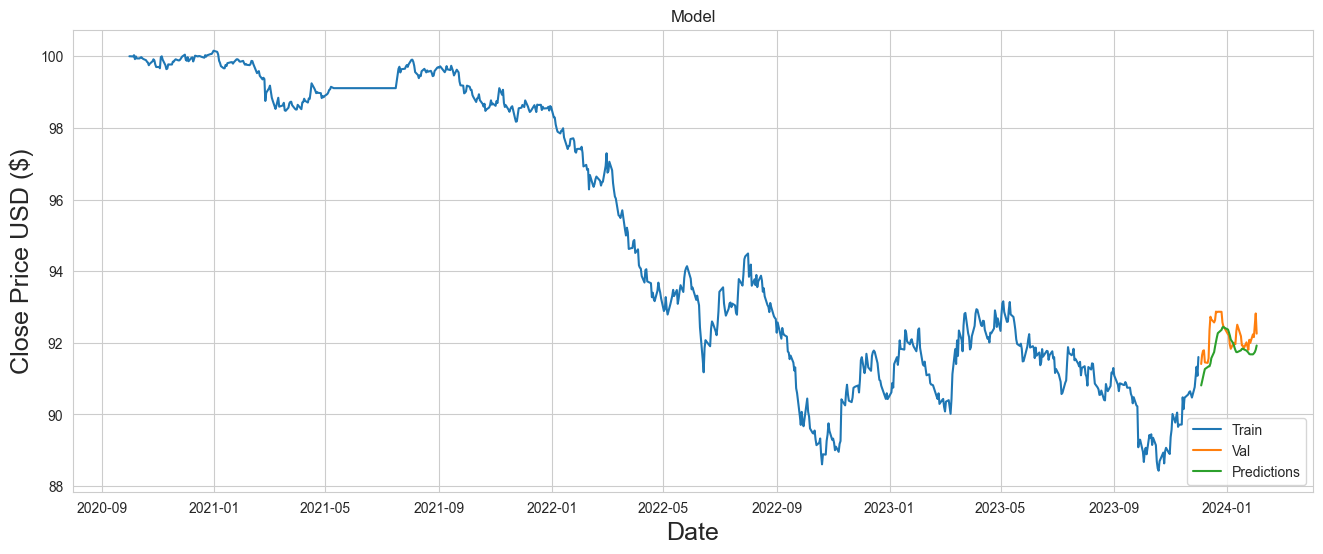

In [59]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [61]:
valid

,Close,Predictions
Date,,
2023-12-04,91.410500,90.811646
2023-12-05,91.659500,90.925278
2023-12-06,91.776398,91.042709
2023-12-07,91.791901,91.161087
2023-12-08,91.455002,91.268524
2023-12-11,91.440300,91.323708
2023-12-12,91.568802,91.340469
2023-12-13,92.353104,91.345726
2023-12-14,92.730003,91.423004
